In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv("reviews.csv", parse_dates=True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

In [2]:
len(data) - data['Rating'].isnull().sum() 

45000

## Rating average by day/week

In [3]:
data['Day'] = data['Timestamp'].dt.date

In [4]:
day_avg = data.groupby('Day')
day_avg.mean()

Rating
Day                 
2018-01-01  4.532609
2018-01-02  4.122807
2018-01-03  4.360465
2018-01-04  4.531250
2018-01-05  4.423077
...              ...
2021-03-29  4.240000
2021-03-30  4.428571
2021-03-31  4.453125
2021-04-01  4.592593
2021-04-02  4.357143

[1188 rows x 1 columns]

In [5]:
days = day_avg.mean()

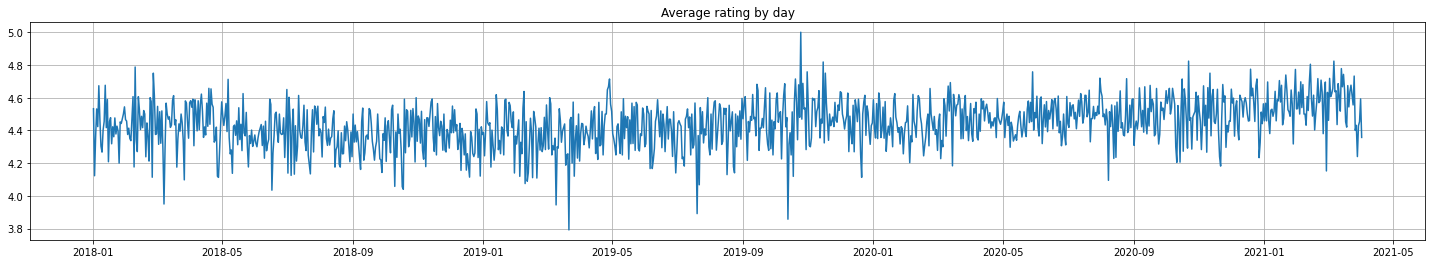

In [6]:
plt.figure(figsize=(25,4))
plt.plot(days.index, days['Rating'])
plt.grid()
plt.title('Average rating by day')
plt.show()

In [7]:
day_avg[['Day','Rating']].head()

Day  Rating
0      2021-04-02     4.0
1      2021-04-02     4.0
2      2021-04-02     4.0
3      2021-04-02     5.0
4      2021-04-02     4.5
...           ...     ...
44954  2018-01-01     4.5
44955  2018-01-01     4.0
44956  2018-01-01     4.5
44957  2018-01-01     5.0
44958  2018-01-01     3.5

[5940 rows x 2 columns]

In [8]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')

In [9]:
week_avg = data.groupby('Week')

In [10]:
weeks = week_avg.mean()

In [11]:
ticks = list(weeks.index[::20])
ticks.append(weeks.index[-1])

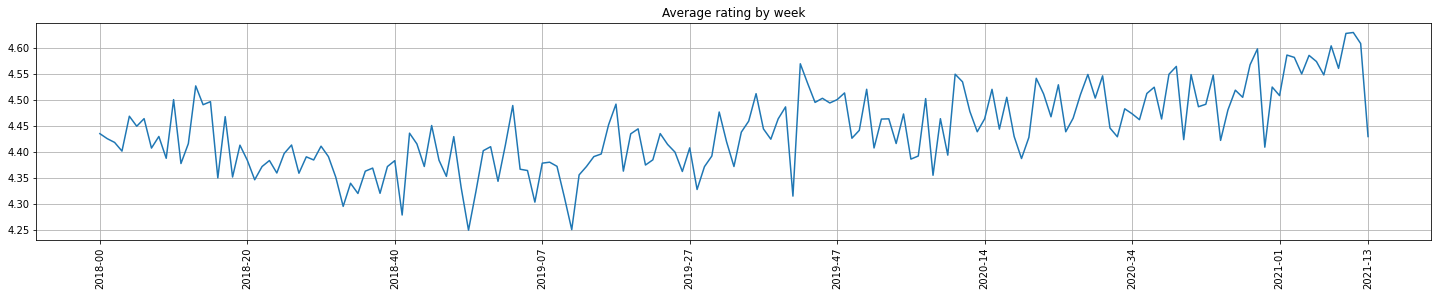

In [104]:
plt.figure(figsize=(25,4))
plt.plot(weeks.index, weeks['Rating'])
plt.title('Average rating by week')
plt.xticks(ticks, ticks, rotation='vertical')
plt.grid()
plt.show()

## Rating average by month

In [13]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')

In [14]:
month_avg = data.groupby('Month')

In [15]:
months = month_avg.mean()

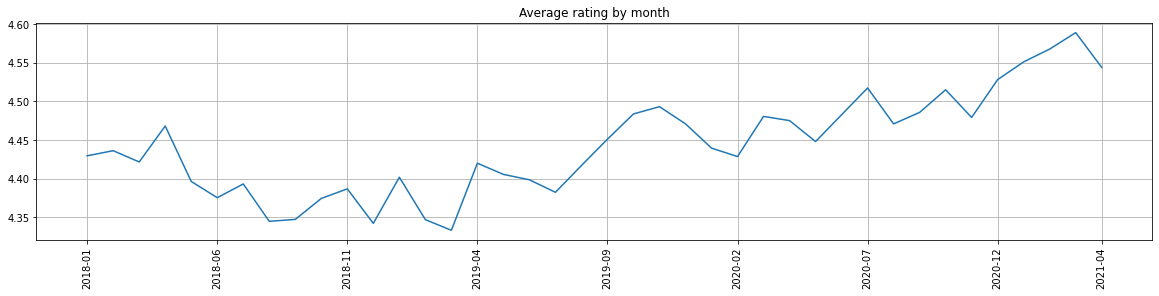

In [16]:
plt.figure(figsize=(20,4))
plt.plot(months.index, months['Rating'])
plt.title('Average rating by month')
ticks_ = list(months.index[::5])
ticks_.append(months.index[-1])
plt.xticks(ticks_, ticks_, rotation='vertical')
plt.grid()
plt.show()

## Rating average by month by course

In [24]:
month_avg_course = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

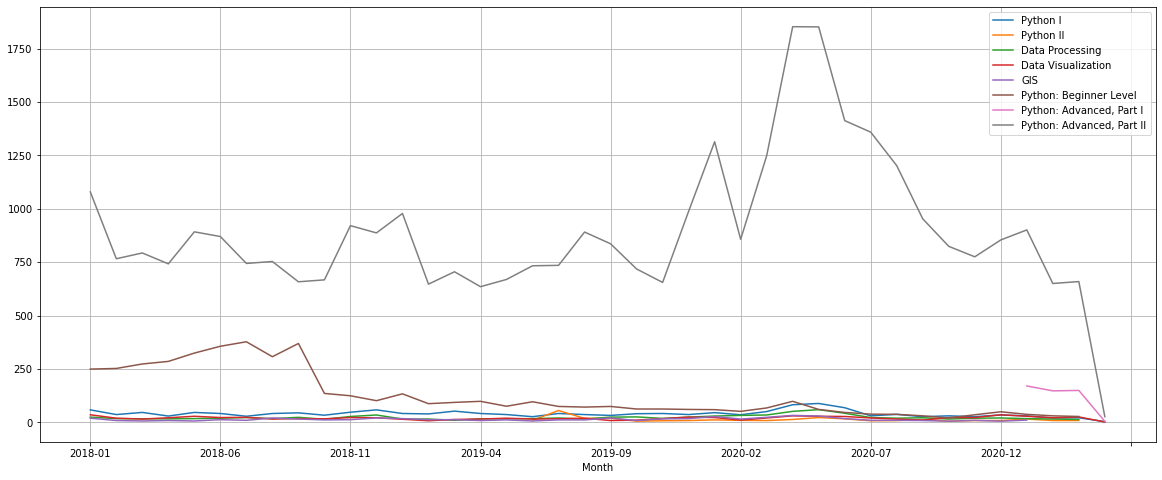

In [112]:
month_avg_course.plot(figsize=(20,8), grid = True).legend(['Python I', 'Python II', 'Data Processing', 'Data Visualization', 'GIS', 'Python: Beginner Level', 'Python: Advanced, Part I', 'Python: Advanced, Part II'])

## What day are people the most positive?

In [72]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Weekday_num'] = data['Timestamp'].dt.strftime('%w')

In [81]:
weekday_avg = data.groupby(['Weekday', 'Weekday_num']).mean()
weekday_avg = weekday_avg.sort_values('Weekday_num')

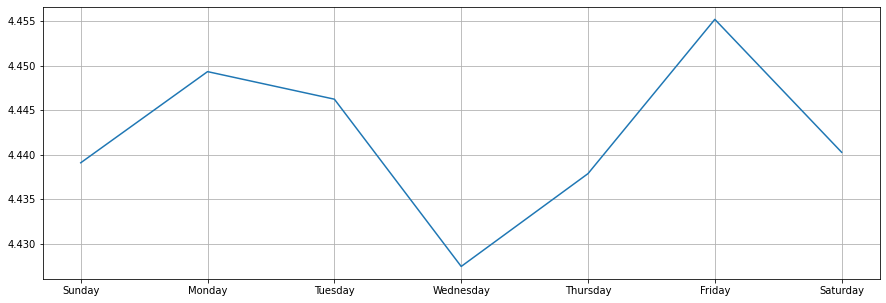

In [103]:
plt.figure(figsize=(15,5))
plt.plot(weekday_avg.index.get_level_values(0), weekday_avg['Rating'])
plt.grid()
plt.show()